# 数据可视化

数据可视化是将数据转换为图形表示的过程，以便更容易理解和分析。它通过图表、图形和其他视觉手段呈现数据，使复杂的信息更直观。数据可视化对理解数据特征、发现模式、发现异常值、预测趋势、发现关联性等有着重要作用。

本项目中，我们将使用Matplotlib库和Seaborn库进行数据可视化。Matplotlib是一个Python的2D绘图库，可用于创建各种类型的图表，如折线图、散点图、直方图、饼图等。其文档官网为`https://matplotlib.org/stable/index.html`。Seaborn库是基于Matplotlib的高级数据可视化库，它提供了更高级的图表类型，如热力图、小提琴图、分布图等。其文档官网为`https://seaborn.pydata.org/index.html`。

In [4]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ["Noto Sans CJK JP"]  # 正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [3]:
dataset_paths = {
    '激光载荷': '../../data/train/激光载荷',
    '供配电': '../../data/train/供配电', 
    '姿轨控': '../../data/train/姿轨控'
}

可视化的时候发现一些warning，一些特征列按照正常和故障划分之后变成单一值，没有分布

这说明这些值与故障和正常强相关，我们可以直接利用这些单一值进行故障诊断。先找出这些值：

In [ ]:
def find_single_value_columns(df):
    """
        查找数据集中只有划分后某一类（正常或故障）具有单一值的列。
        返回两个字典，分别包含只有单一值的正常数据列和故障
    """
    all_normal = {'col': 'value'}
    all_fault = {'col': 'value'}

    for column in df.columns:
        if df.loc[df['label'] == 0, column].nunique() == 1:
            all_normal[column] = df.loc[df['label'] == 0, column].iloc[0]
        elif df.loc[df['label'] != 0, column].nunique() == 1:
            all_fault[column] = df.loc[df['label'] != 0, column].iloc[0]

    return all_normal, all_fault

In [13]:
for name, path in dataset_paths.items():
    print(f"\n==={name}===")
    df = pd.read_csv(os.path.join(path, 'processed_all.csv'))
    all_normal, all_fault = find_single_value_columns(df)
    print(f"只有单一值的正常数据列:")
    for col, val in all_normal.items():
        print(f" {col}: {val}")
        
    print(f"只有单一值的故障数据列")
    for col, val in all_fault.items():
        print(f" {col}: {val}")


===激光载荷===
只有单一值的正常数据列:
 EDFA主放（主）故障状态自检反馈: 0
 label: 0
只有单一值的故障数据列
 激光处理机最后一条接收指令编号: 4
 激光终端处理机供电电压: 42
 模块工作状态-转台: 0
 转台方位轴控温点1: 1
 转台方位轴控温点2: 1
 转台高度轴控温点1: 1
 转台高度轴控温点2: 1
 光学基板控温点1: 1
 光学基板控温点2: 1
 光学基板控温点3: 1
 可见光图像传感器光斑Y坐标: 0
 转台方位轴测温点1: 18
 转台高度轴测温点1: 20
 转台高度轴测温点2: 22
 光学基板测温点1: 24
 光学基板测温点2: 20

===供配电===
只有单一值的正常数据列:
 蓄电池加热器2通断状态: 1
 蓄电池加热器3通断状态: 1
 -Y板加热器1通断状态: 1
 -Y板加热器2通断状态: 1
 -Y板加热器3通断状态: 1
 label: 0
只有单一值的故障数据列

===姿轨控===
只有单一值的正常数据列:
 平衡方程满足标志: 1
 label: 0
只有单一值的故障数据列
 子模式_入轨段控制模式: 1
 正Y翼B轴控制模式: 2
 负Y翼B轴控制模式: 2
 冷气推力器1控制脉宽: 0.0
 冷气推力器2控制脉宽: 0.0
 冷气推力器3控制脉宽: 0.0
 冷气推力器4控制脉宽: 0.0
 陀螺3有效性标志: 1
 陀螺4有效性标志: 1
 星敏1工作模式: 1
 星敏2工作模式: 1
 星敏3工作模式: 1
 电推工作模式: 0


In [14]:
def visulize(name, df):
    """
        对数据中每个特征，分别绘制正常数据和故障数据的分布图
    """ 

    target_fault = df['label'] != 0 # 可以修改为特定的故障类型来查看
    normal = df['label'] == 0

    cols = 6
    rows = (df.shape[1] + cols - 1) // cols
    plt.figure(figsize=(20, 4 * rows))

    for i, column in enumerate(df.columns):
        # 跳过object类型的列和标签列
        if df[column].dtype not in [float, int] or column == 'label':
            continue

        # 绘制分布图
        ax = plt.subplot(rows, cols, i + 1)
        sns.kdeplot(df.loc[normal, column], label='正常', color='blue', fill=True, ax=ax)
        sns.kdeplot(df.loc[target_fault, column], label='故障', color='red', fill=True, ax=ax)
        ax.set_title(f"{name} - {column} 分布")
        ax.legend()

    plt.tight_layout()
    plt.show()


=== 可视化 激光载荷 数据集 ===


/tmp/ipykernel_149370/362839384.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df.loc[target_fault, column], label='故障', color='red', fill=True, ax=ax)
/tmp/ipykernel_149370/362839384.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df.loc[target_fault, column], label='故障', color='red', fill=True, ax=ax)
/tmp/ipykernel_149370/362839384.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df.loc[target_fault, column], label='故障', color='red', fill=True, ax=ax)
/tmp/ipykernel_149370/362839384.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df.loc[target_fault, column], label='故障', color='red', fill=True, ax=ax)
/tmp/ipykernel_149370/362839384.

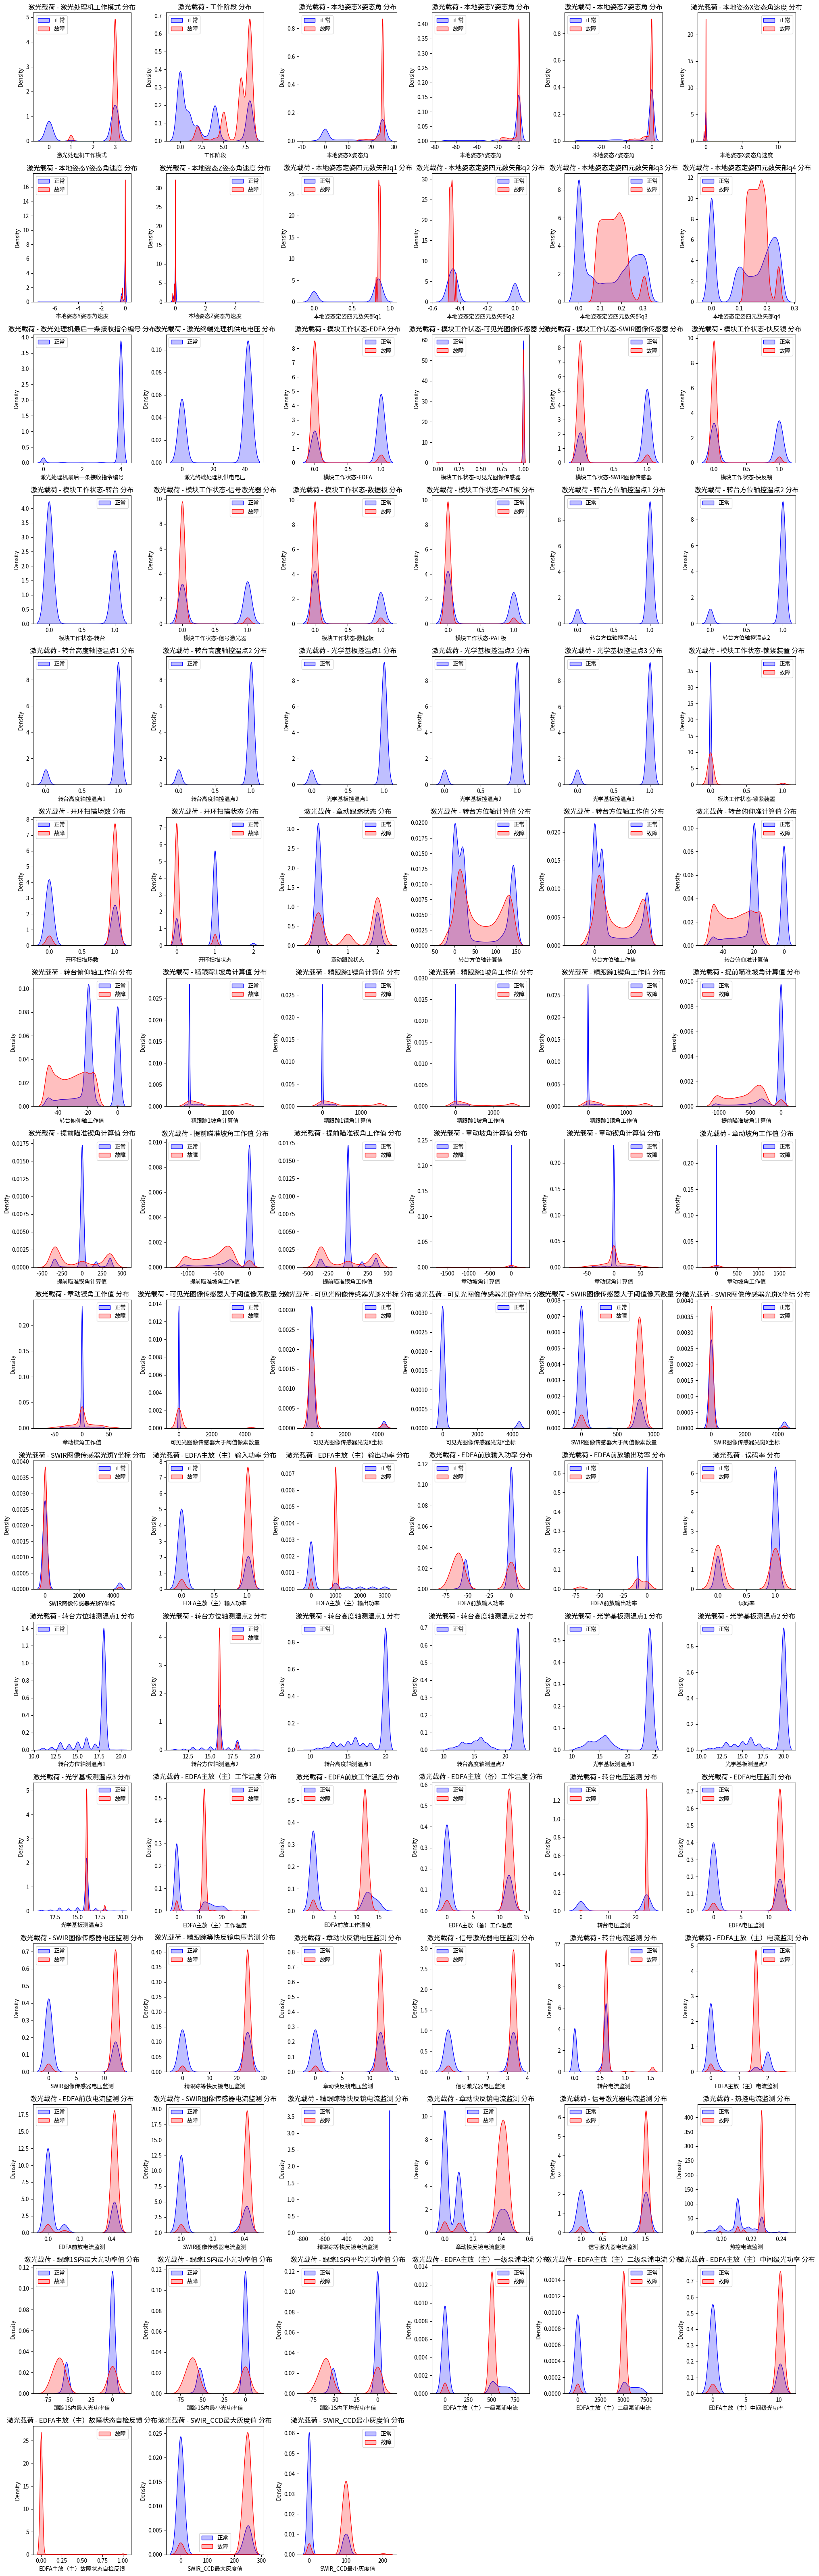


=== 可视化 供配电 数据集 ===


/tmp/ipykernel_149370/362839384.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df.loc[normal, column], label='正常', color='blue', fill=True, ax=ax)
/tmp/ipykernel_149370/362839384.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df.loc[normal, column], label='正常', color='blue', fill=True, ax=ax)
/tmp/ipykernel_149370/362839384.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df.loc[normal, column], label='正常', color='blue', fill=True, ax=ax)
/tmp/ipykernel_149370/362839384.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df.loc[normal, column], label='正常', color='blue', fill=True, ax=ax)
/tmp/ipykernel_149370/362839384.py:20: UserWarning: 

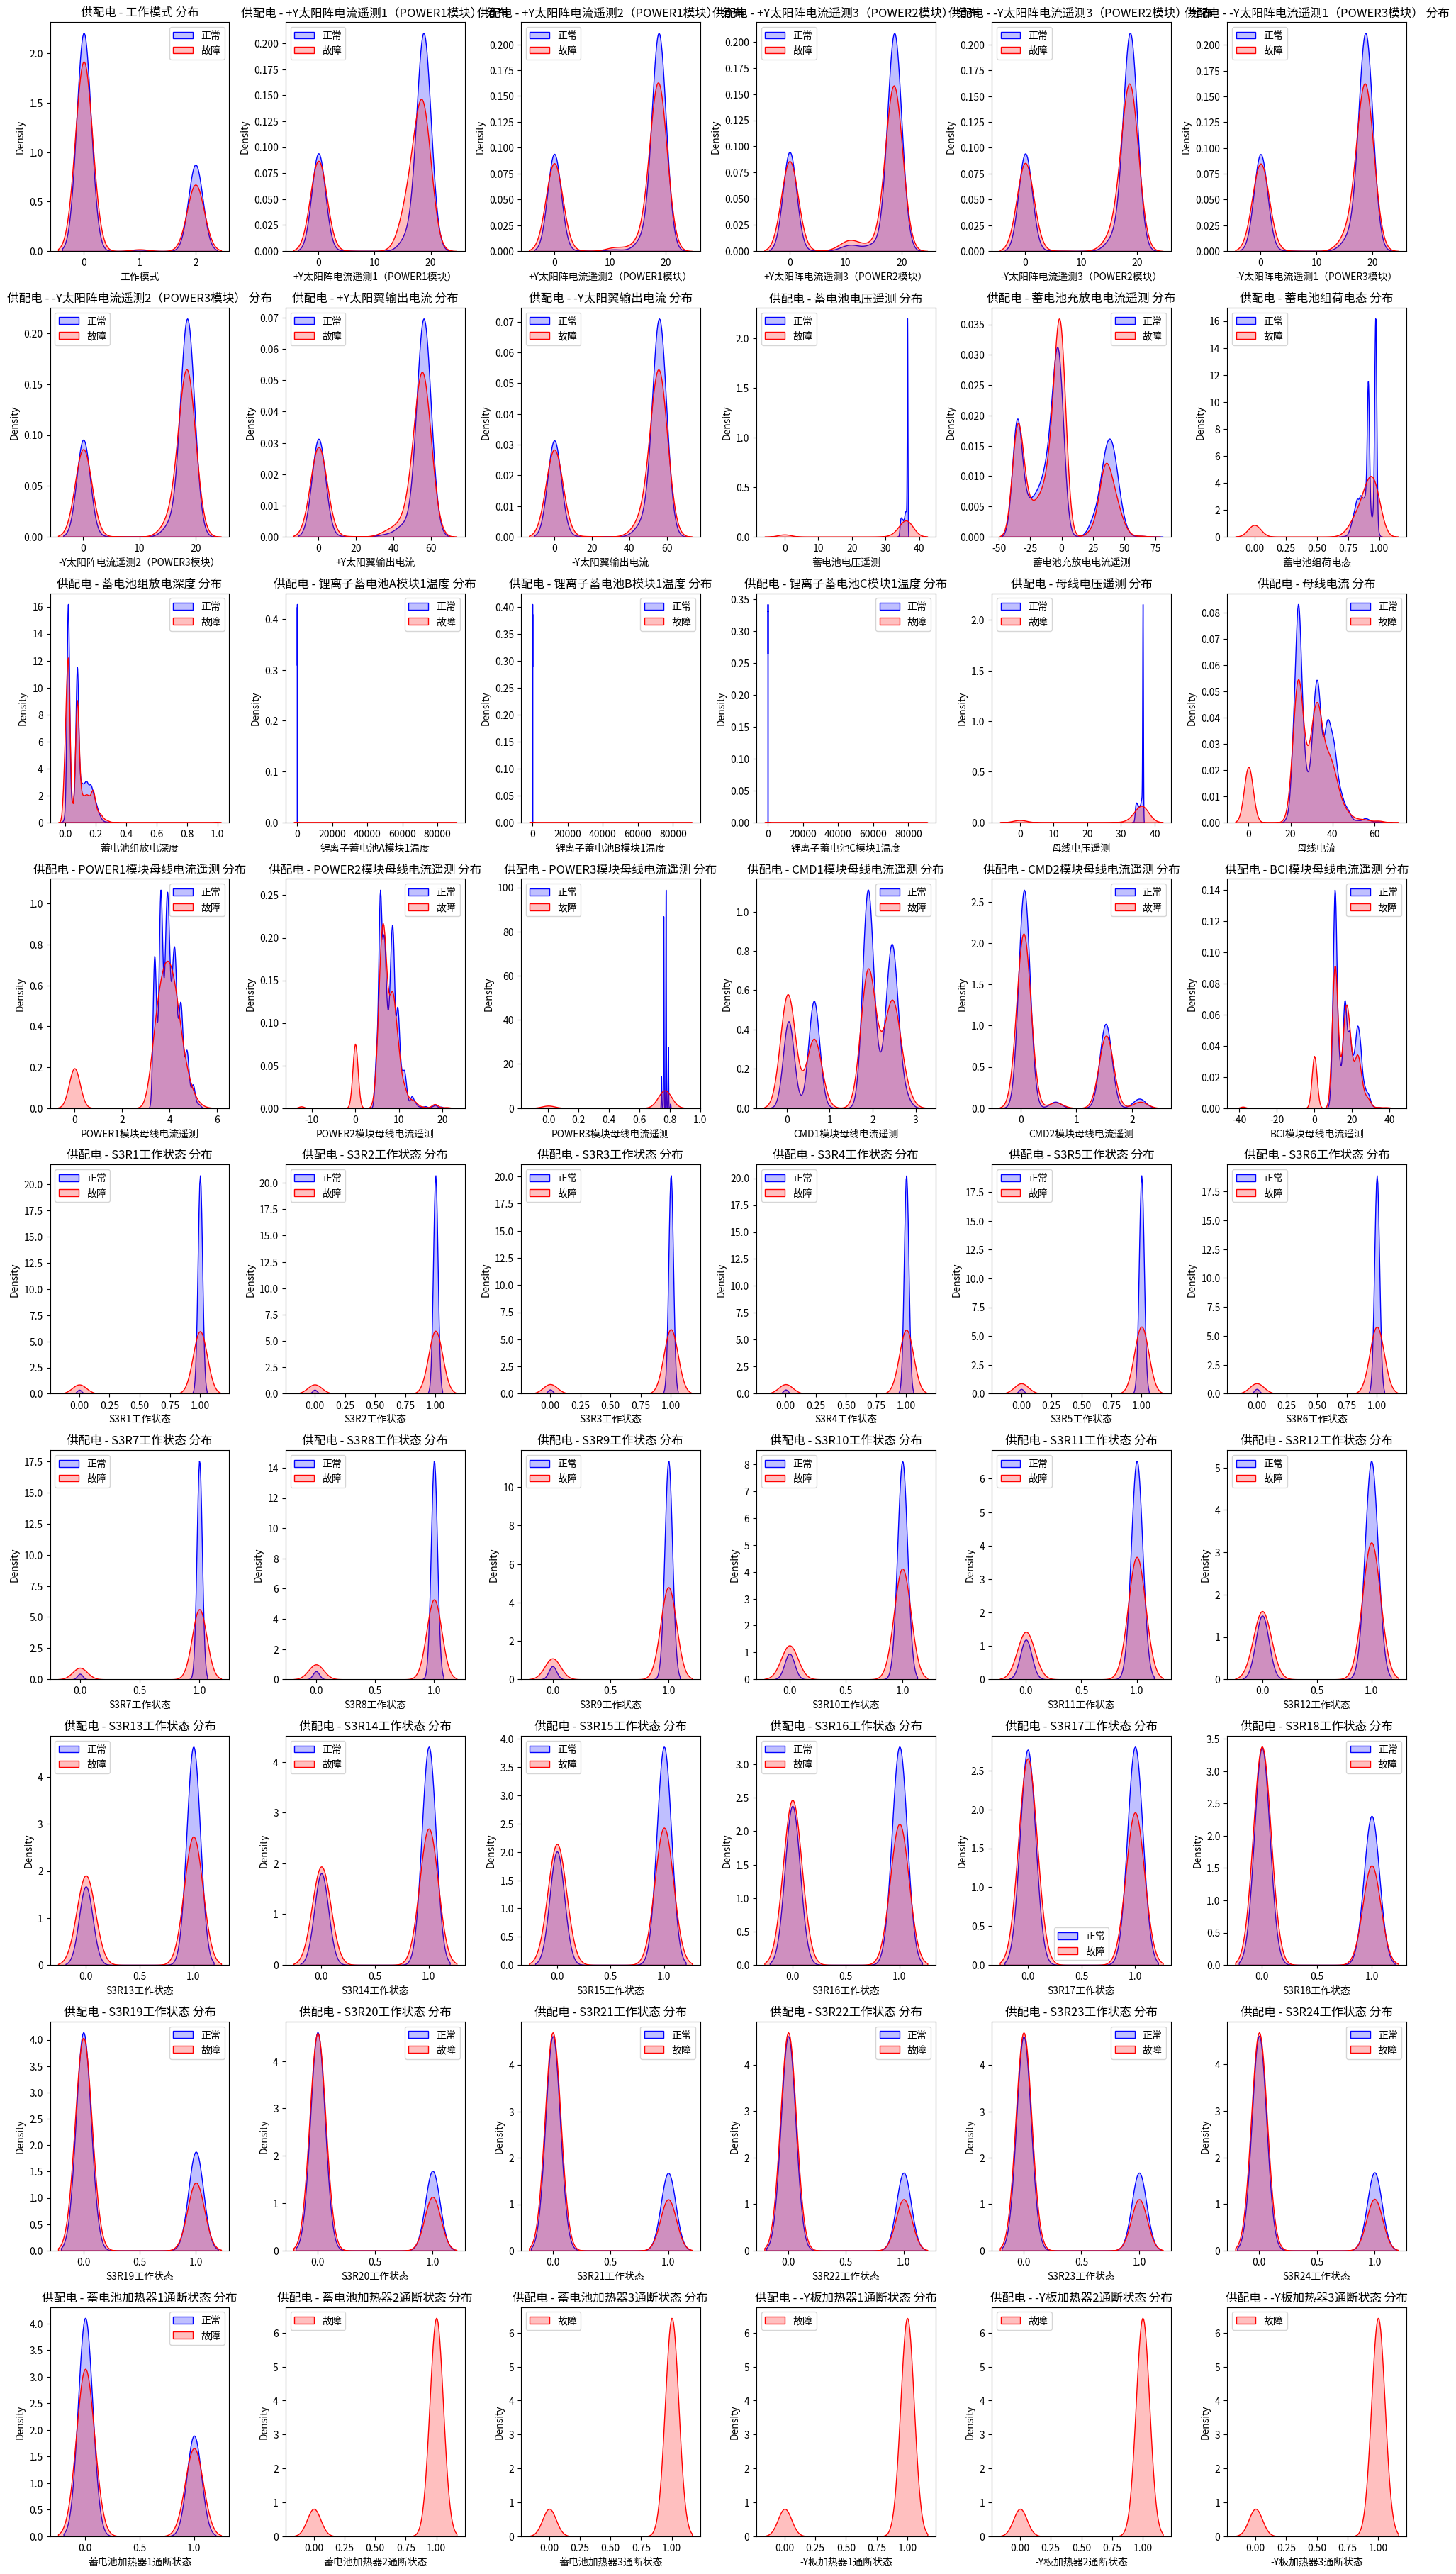


=== 可视化 姿轨控 数据集 ===


/tmp/ipykernel_149370/362839384.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df.loc[target_fault, column], label='故障', color='red', fill=True, ax=ax)
/tmp/ipykernel_149370/362839384.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df.loc[target_fault, column], label='故障', color='red', fill=True, ax=ax)
/tmp/ipykernel_149370/362839384.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df.loc[target_fault, column], label='故障', color='red', fill=True, ax=ax)
/tmp/ipykernel_149370/362839384.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df.loc[target_fault, column], label='故障', color='red', fill=True, ax=ax)
/tmp/ipykernel_149370/362839384.

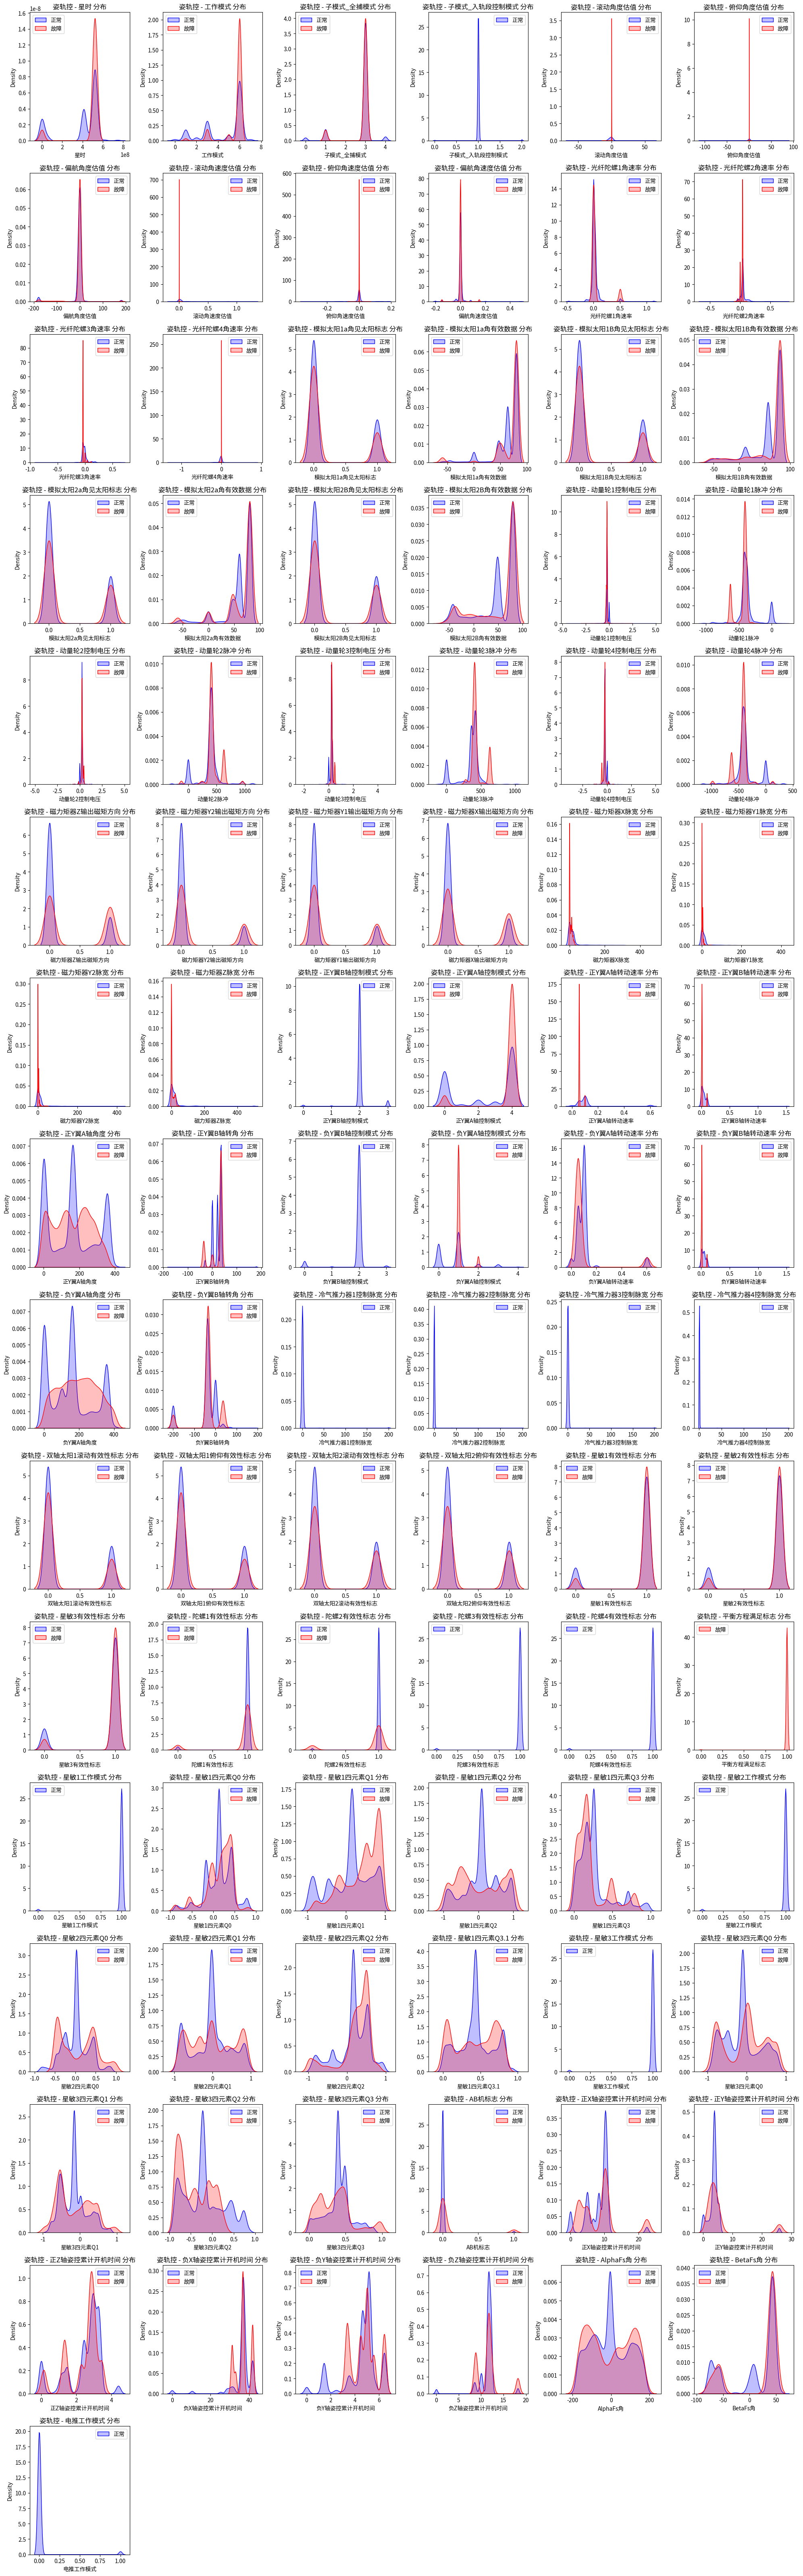

In [15]:
for name, path in dataset_paths.items():
    print(f"\n=== 可视化 {name} 数据集 ===")
    df = pd.read_csv(os.path.join(path, 'processed_all.csv'))
    visulize(name, df)